In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [15]:
pd.set_option('display.max_columns', None)

In [2]:
beer = pd.read_csv('beers.csv')

In [3]:
beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
beer.shape

(2410, 8)

In [5]:
beer.drop(columns='Unnamed: 0', inplace=True)

In [6]:
beer.isnull().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [7]:
beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [8]:
beer.dropna(inplace=True)

In [9]:
beer.shape

(1403, 7)

In [18]:
beer['style_codes'] = beer['style'].astype('category').cat.codes
beer.head()

,abv,ibu,id,name,style,brewery_id,ounces,style_codes
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,15
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,5
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,88
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,15
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,55


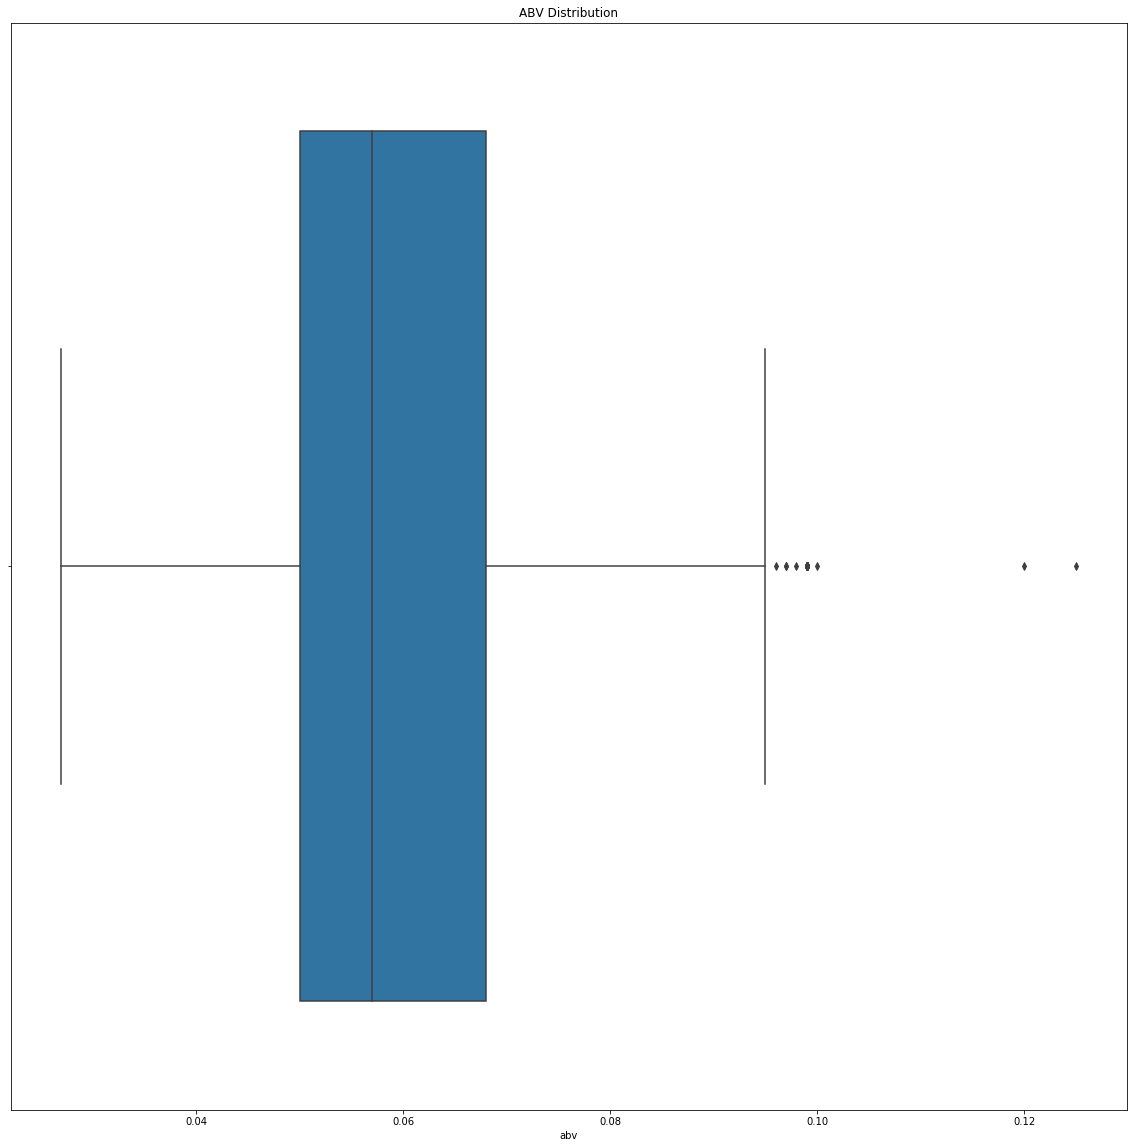

In [14]:
plt.figure(figsize=(20, 20))
sns.boxplot(beer['abv'])
plt.title('ABV Distribution')
plt.savefig('ABV_Dist')
plt.show()

In [21]:
timelapseQ1 = beer['abv'].quantile(0.25)
timelapseQ3 = beer['abv'].quantile(0.75)
IQR = timelapseQ3 - timelapseQ1
print(IQR)

0.018000000000000002


In [22]:
beer = beer[~((beer['abv'] < (timelapseQ1 - 1.5 * IQR)) |(beer['abv'] > (timelapseQ3 + 1.5 * IQR)))]
beer.shape

(1371, 8)

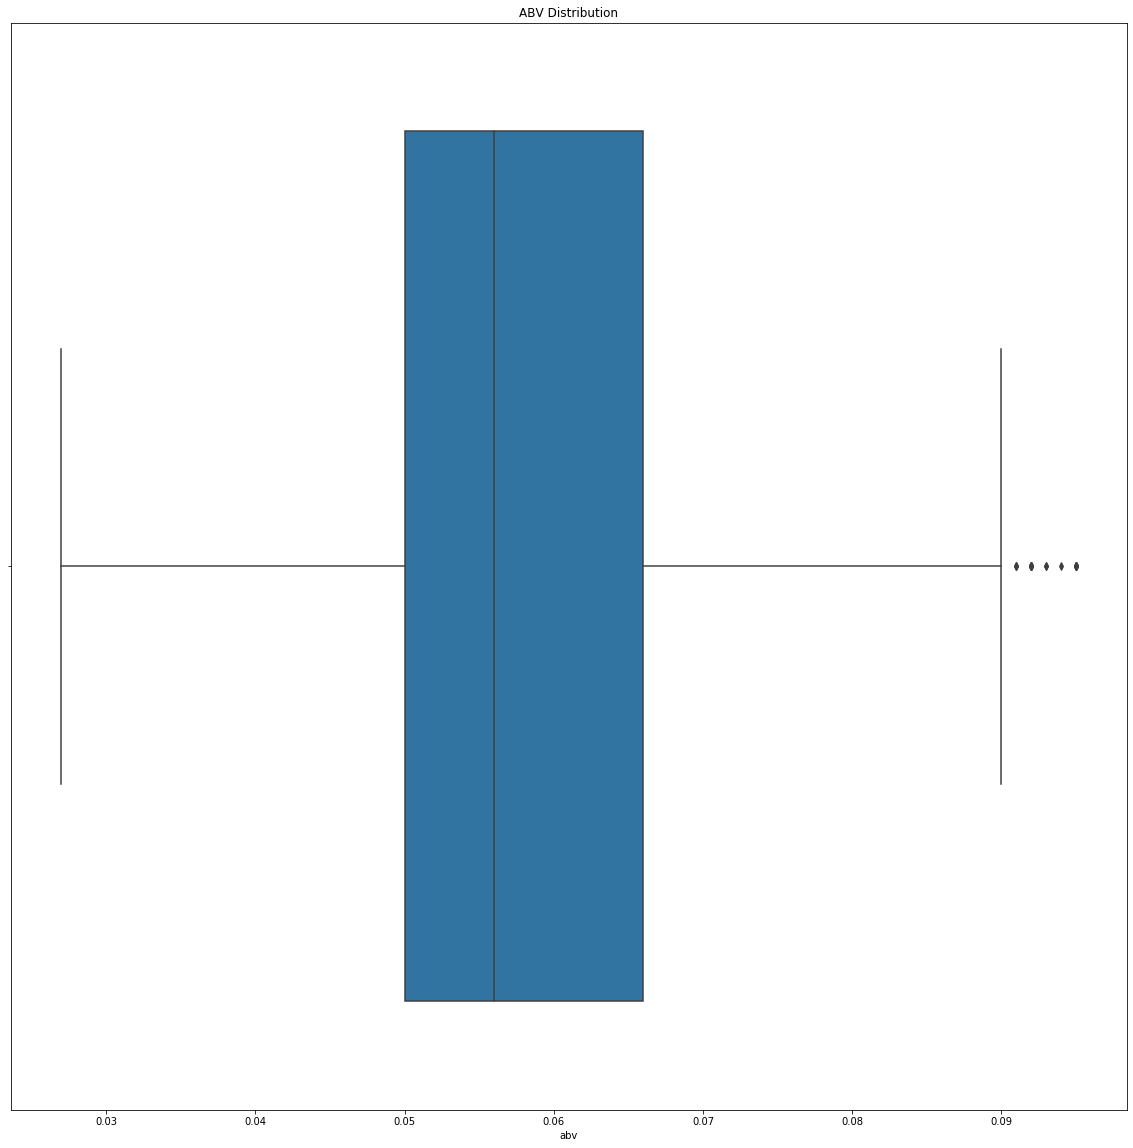

In [23]:
plt.figure(figsize=(20, 20))
sns.boxplot(beer['abv'])
plt.title('ABV Distribution')
plt.savefig('ABV_Dist')
plt.show()

In [26]:
beer['abv'].describe()

count    1371.000000
mean        0.058977
std         0.012214
min         0.027000
25%         0.050000
50%         0.056000
75%         0.066000
max         0.095000
Name: abv, dtype: float64

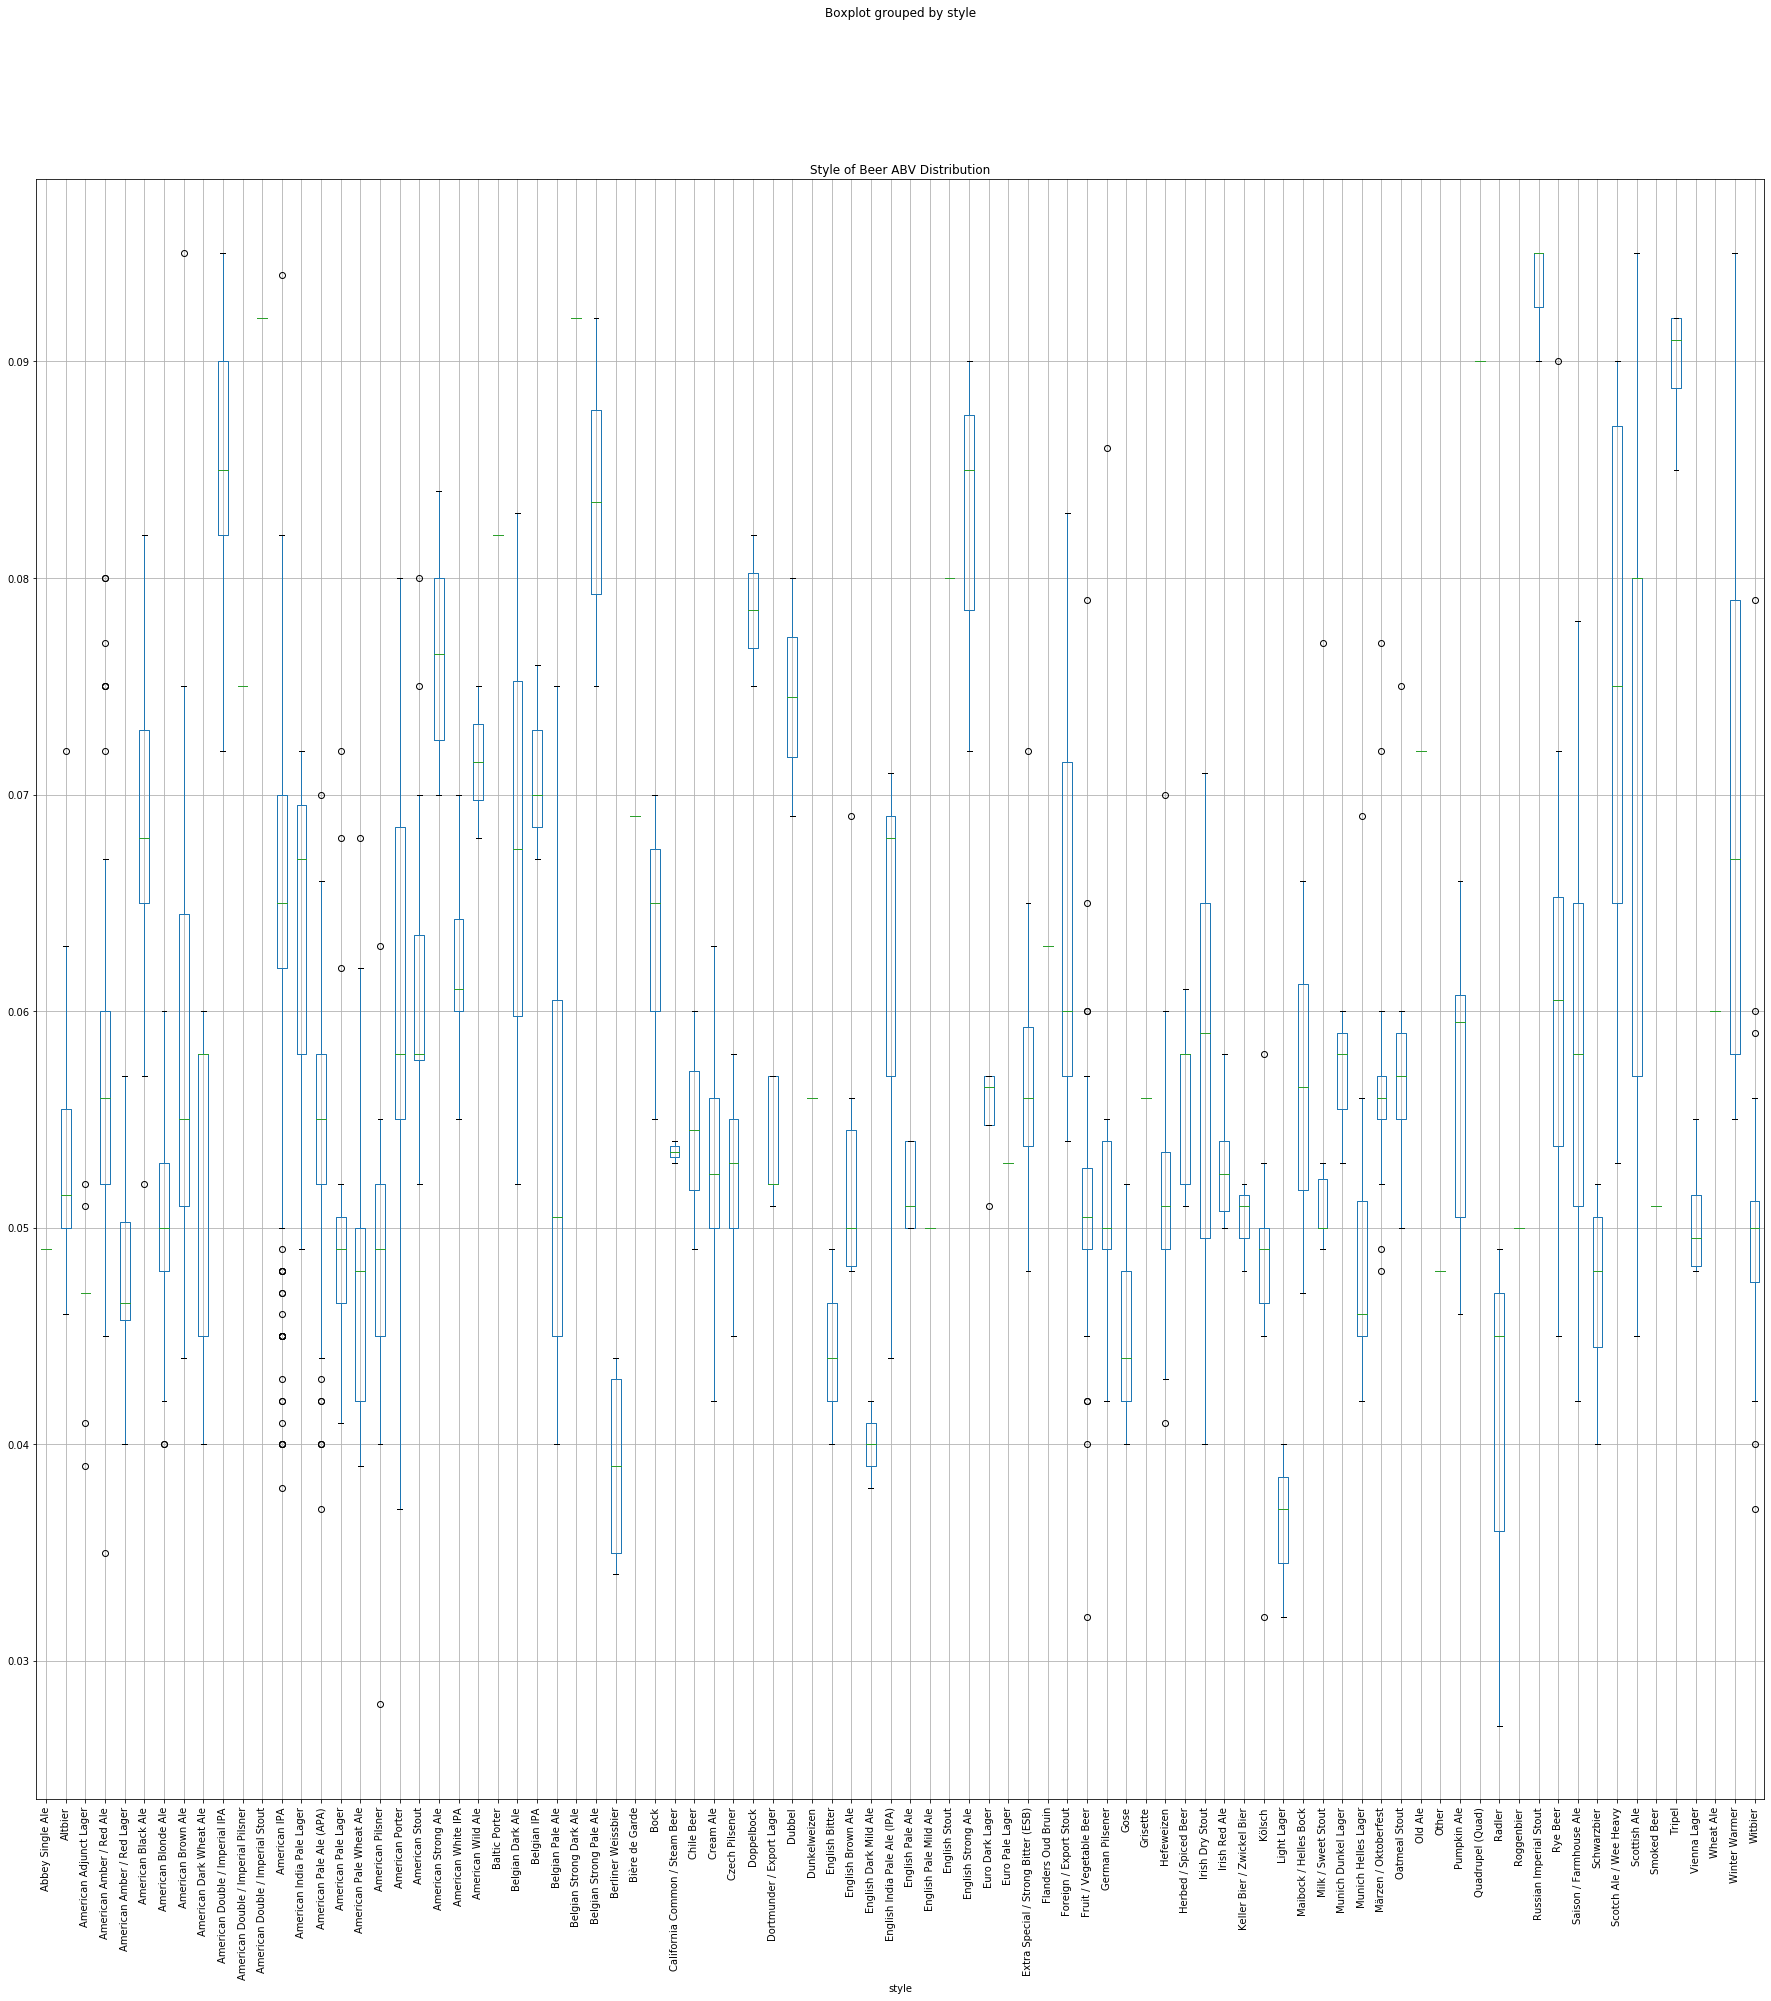

In [24]:
beer.boxplot('abv', by='style', figsize=(30,30), rot=90)
plt.title('Style of Beer ABV Distribution')
plt.savefig('style_dist.png')
plt.show()

In [27]:
beer.corr()

,abv,ibu,id,brewery_id,ounces,style_codes
abv,1.000000,0.651646,-0.021843,0.013532,0.098089,-0.124179
ibu,0.651646,1.000000,0.008387,0.006128,0.055133,-0.399466
id,-0.021843,0.008387,1.000000,-0.433505,0.051318,-0.052153
brewery_id,0.013532,0.006128,-0.433505,1.000000,-0.126182,0.013158
ounces,0.098089,0.055133,0.051318,-0.126182,1.000000,0.015848
style_codes,-0.124179,-0.399466,-0.052153,0.013158,0.015848,1.000000


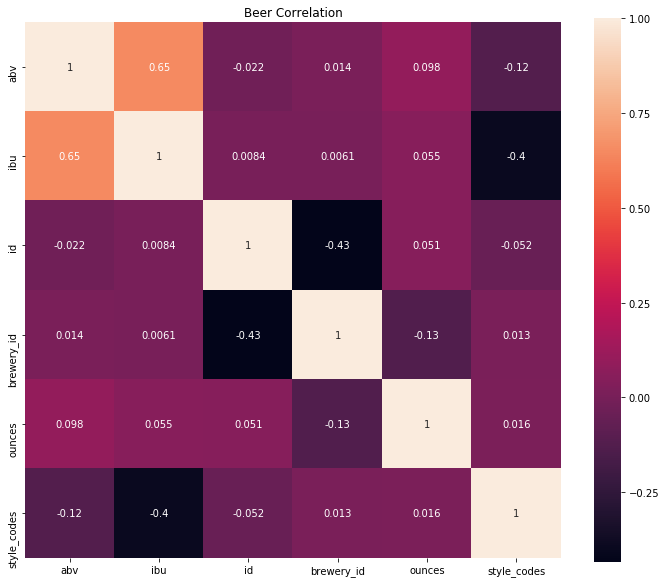

In [58]:
plt.figure(figsize=(12, 10))
plt.title('Beer Correlation')
ax = sns.heatmap(beer.corr(), annot = True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('BeerCorr.png')
plt.show()

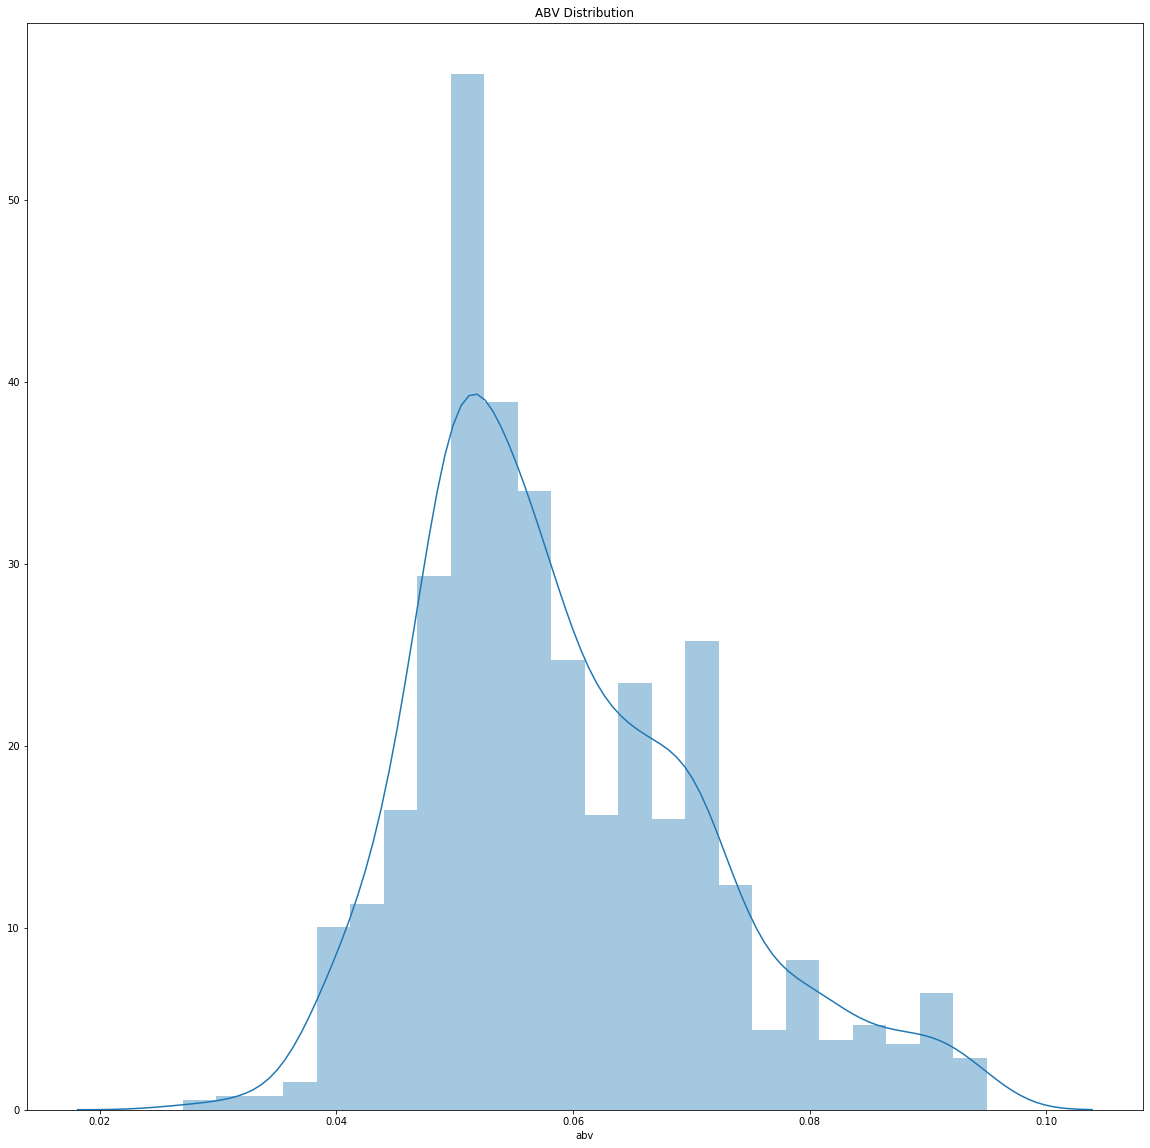

In [76]:
plt.figure(figsize=(20,20))
plt.title('ABV Distribution')
sns.distplot(beer['abv'])
plt.savefig('ABVDist.png')
plt.show()

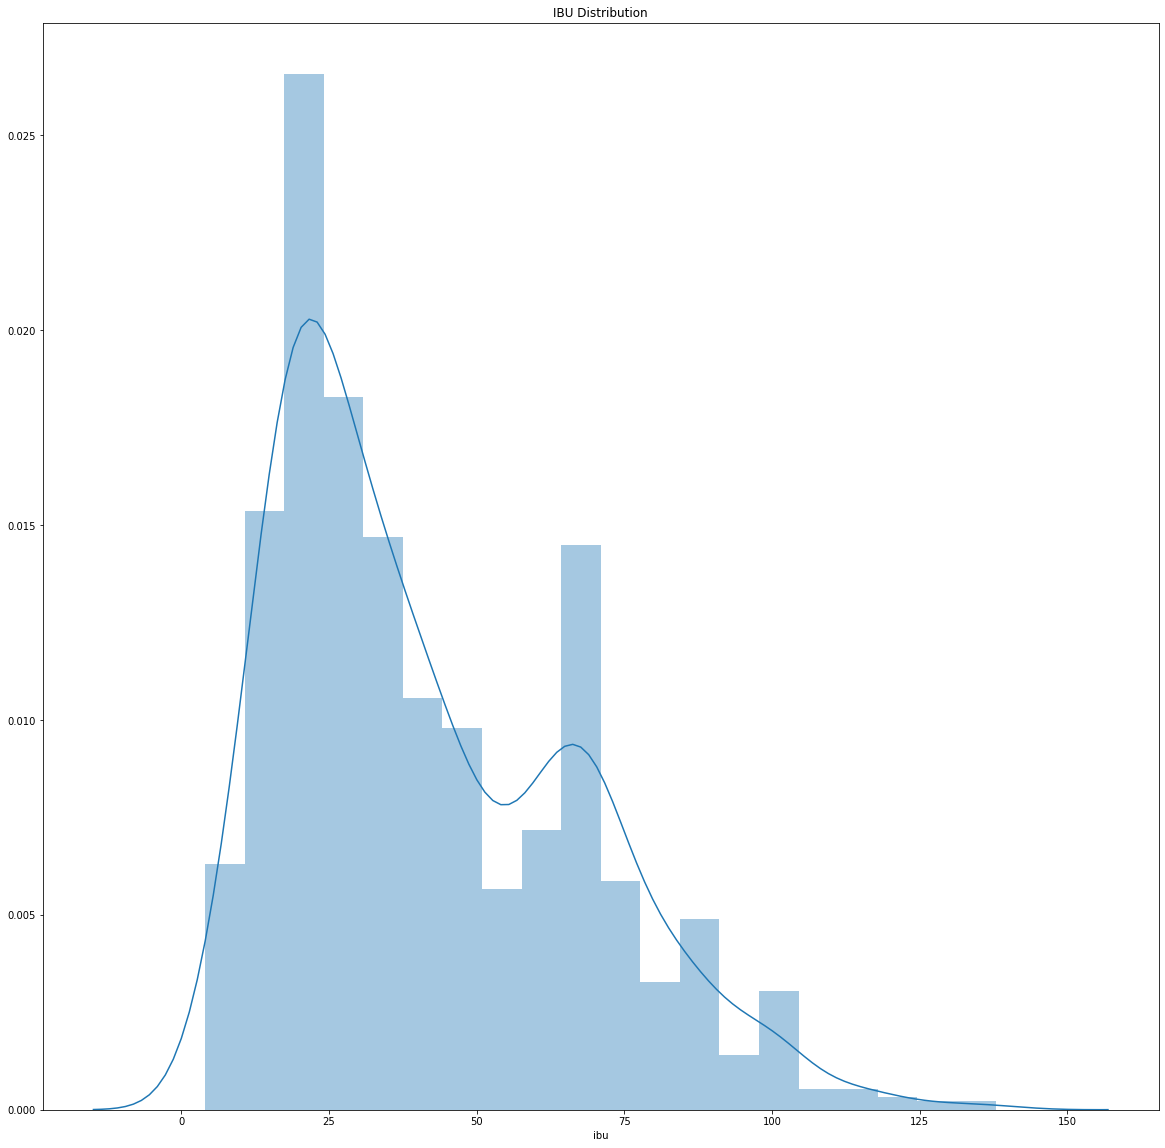

In [77]:
plt.figure(figsize=(20,20))
plt.title('IBU Distribution')
sns.distplot(beer['ibu'])
plt.savefig('IBUDist.png')
plt.show()

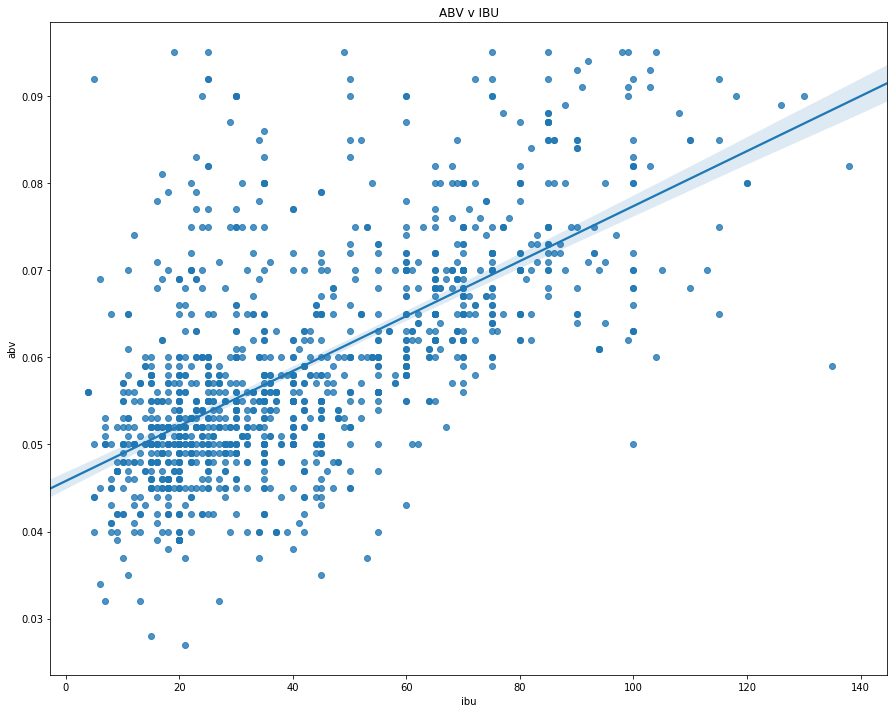

In [85]:
plt.figure(figsize=(15, 12))
plt.title('ABV v IBU')
sns.regplot(beer['ibu'], beer['abv'])
plt.savefig('abvibuscat.png')
plt.show()

In [61]:
target = beer['abv']

In [62]:
feature = beer['ibu']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=34,test_size=0.2)

In [86]:
model = sm.OLS(y_train,X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    abv   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              4968.
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        22:26:43   Log-Likelihood:                          2458.3
No. Observations:                1096   AIC:                                     -4915.
Df Residuals:                    1095   BIC:                                     -4910.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ibu            0.0011   1.58e-05     70.485      0.000       0.001       0.001
==============================================================================
Omnibus:                       55.131   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.156
Skew:                          -0.543   Prob(JB):                     1.93e-14
Kurtosis:                       3.451   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
ytest_pred = model.predict(X_test)

In [92]:
ytrain_pred = model.predict(X_train)

In [93]:
print('Train - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, ytrain_pred)))
print('Train - Mean Squared Error:' + str(metrics.mean_squared_error(y_train, ytrain_pred)))
print('Train - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred))))

print("")

print('Test - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, ytest_pred)))
print('Test - Mean Squared Error:' + str(metrics.mean_squared_error(y_test, ytest_pred)))
print('Test - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, ytest_pred))))

Train - Mean Absolute Error:0.021467642036035118
Train - Mean Squared Error:0.0006595892151870644
Train - SqRt Mean Squared Error:0.025682469024357148

Test - Mean Absolute Error:0.02047128680204676
Test - Mean Squared Error:0.0005965358089851192
Test - SqRt Mean Squared Error:0.024424082561789687
